<a href="https://colab.research.google.com/github/Michael-Jimenez-C/Investigaci-n-de-operaciones/blob/main/Tarea5IO/PD_deterministica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [4]:
G=nx.DiGraph()

aristas=[[(1,2,8),(1,3,7),(1,4,8)],
         
         [(2,5,9),(2,6,10),
         (3,5,5),(3,6,7),(3,7,5),(3,8,6),
         (4,7,8),(4,8,14)],
         
         [(5,9,8),(5,10,6),
         (6,9,4),(6,10,3),
         (7,9,11),(7,10,8),(7,11,7),
         (8,10,12),(8,11,6)],
         
         [(9,12,14),
         (10,12,6),
         (11,12,15)]]
nodos=[[1],[2,3,4],[5,6,7,8],[9,10,11],[12]]


In [3]:
#@title Texto de título predeterminado
G=nx.DiGraph()

aristas=[[(1,2,6),(1,3,8),(1,4,7)],
         
         [(2,5,9),(2,6,10),
         (3,5,5),(3,6,7),(3,7,5),(3,8,6),
         (4,7,8),(4,8,14)],
         
         [(5,9,10),(5,10,8),
         (6,9,7),(6,10,9),
         (7,9,11),(7,10,8),(7,11,7),
         (8,10,12),(8,11,6)],
         
         [(9,12,14),
         (10,12,6),
         (11,12,15)]]
nodos=[[1],[2,3,4],[5,6,7,8],[9,10,11],[12]]

In [19]:
for i in aristas:
  for j in i:
    G.add_edge(j[0],j[1],weight=j[2])
options = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 4
}

espacio=5
pos={}
for i in range(len(nodos)):
  for j in range(len(nodos[i])):
    pos[nodos[i][j]]=(i*espacio,(-j+(len(nodos[i])-1)/2))


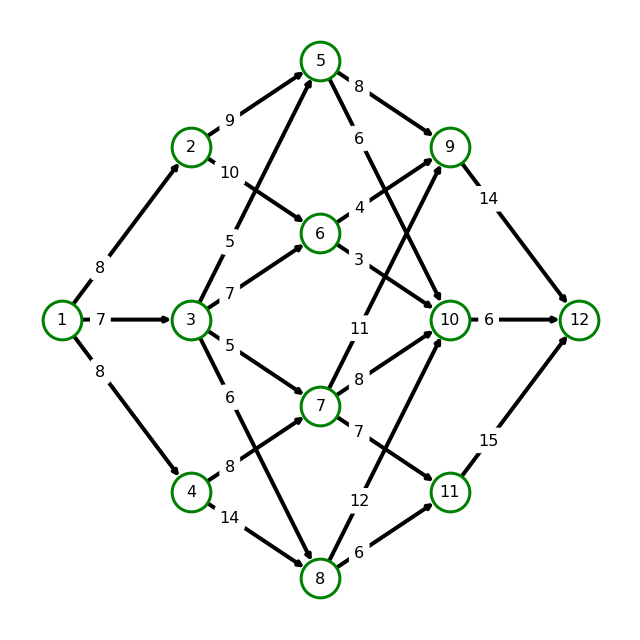

In [24]:
plt.figure(figsize=(9,9))
nx.draw_networkx(G, pos,**options)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,label_pos=.7,rotate=False,font_size=16)
ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.savefig("Grafo.pdf",dpi=500)
plt.show()

In [7]:
def hallar(origen,destino,aristas,i=-1,r={}):
  if len(aristas)+i<0:
    return r
  for j in aristas[i]:
    if(j[1]==destino):
      r[j[0]]=(j[1],j[2])
    else:
      if not (j[0] in r):
        r[j[0]]=(None,np.infty)
      elif (j[2]+r[j[1]][1])<r[j[0]][1]:
        r[j[0]]=(j[1],j[2]+r[j[1]][1])

  return hallar(origen,destino,aristas,i-1,r)

In [26]:
destino=12
origen=1
r=hallar(origen,destino,aristas)
      
camino=[origen]
while camino[-1]!=destino:
  camino.append(r[camino[-1]][0])

sol=camino
print(sol)
print(r[camino[0]][1])

[1, 3, 6, 10, 12]
23


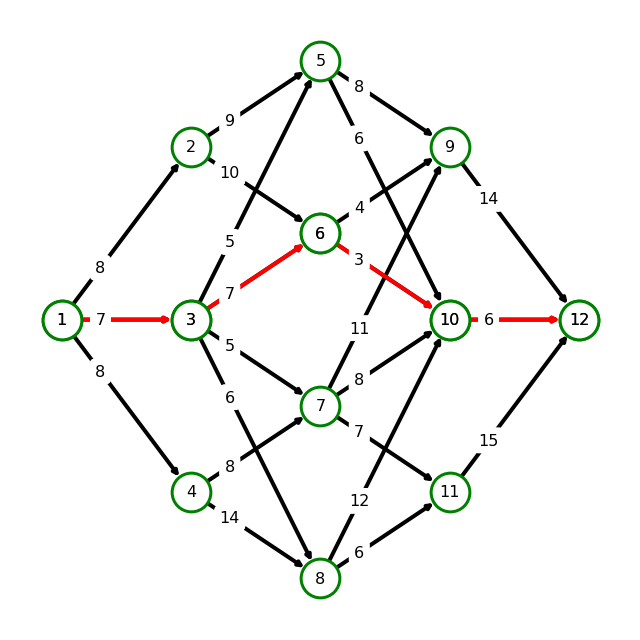

In [25]:
Gs=G.subgraph(sol)
'''
Gs=nx.DiGraph()
for i in range(len(sol)-1):
  Gs.add_edge(sol[i],sol[i+1])
'''

plt.figure(figsize=(9,9))

nx.draw_networkx(G, pos,**options)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,label_pos=.7,rotate=False,font_size= 16)

nx.draw_networkx(Gs, pos,**options,edge_color="red")
nx.draw_networkx_edge_labels(Gs, pos, edge_labels,label_pos=.7,rotate=False,font_size= 16)
ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.savefig("Grafosolucion.pdf",dpi=500)
plt.show()

Comparación a la solucion lograda por **dijkstra**

In [12]:
print(nx.dijkstra_path(G,origen,destino))
print(nx.dijkstra_path_length(G,origen,destino))

[1, 3, 6, 10, 12]
23
